In [20]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
from textblob import TextBlob
import re
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#driver = webdriver.Firefox()
driver = webdriver.Chrome()
driver.get('https://twitter.com/login')

In [21]:
username = driver.find_element(By.XPATH,"//input[@name='text']")
username.send_keys("kadalsaturnus")
next_button = driver.find_element(By.XPATH,"//span[contains(text(),'Next')]")
next_button.click()


NameError: name 'time' is not defined

In [22]:
password = driver.find_element(By.XPATH,"//input[@name='password']")
password.send_keys('krazelicious')
log_in = driver.find_element(By.XPATH,"//span[contains(text(), 'Log in')]")
log_in.click()

In [36]:
earch_box = driver.find_element(By.XPATH,"//input[@data-testid='Explore']")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//input[@data-testid='Explore']"}
  (Session info: chrome=120.0.6099.217); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF62F6A2142+3514994]
	(No symbol) [0x00007FF62F2C0CE2]
	(No symbol) [0x00007FF62F1676AA]
	(No symbol) [0x00007FF62F1B1860]
	(No symbol) [0x00007FF62F1B197C]
	(No symbol) [0x00007FF62F1F4EE7]
	(No symbol) [0x00007FF62F1D602F]
	(No symbol) [0x00007FF62F1F28F6]
	(No symbol) [0x00007FF62F1D5D93]
	(No symbol) [0x00007FF62F1A4BDC]
	(No symbol) [0x00007FF62F1A5C64]
	GetHandleVerifier [0x00007FF62F6CE16B+3695259]
	GetHandleVerifier [0x00007FF62F726737+4057191]
	GetHandleVerifier [0x00007FF62F71E4E3+4023827]
	GetHandleVerifier [0x00007FF62F3F04F9+689705]
	(No symbol) [0x00007FF62F2CC048]
	(No symbol) [0x00007FF62F2C8044]
	(No symbol) [0x00007FF62F2C81C9]
	(No symbol) [0x00007FF62F2B88C4]
	BaseThreadInitThunk [0x00007FF82427257D+29]
	RtlUserThreadStart [0x00007FF8262AAA58+40]


In [37]:
# klik logo kacamata pembesar
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")

search_box.send_keys("kpu")
search_box.send_keys(Keys.ENTER)

In [42]:
UserTags=[]
TimeStamps=[]
Tweets=[]
Replys=[]
reTweets=[]
Likes=[]
Views=[]
Sentimen=[]

articles = driver.find_elements(By.XPATH,"//article[@data-testid='tweet']")
while True:
    for article in articles:
        UserTag = article.find_element(By.XPATH,".//div[@data-testid='cellInnerDiv']"and".//div[@data-testid='User-Name']"and".//span[contains(text(),'@')]").text
        UserTags.append(UserTag)
        
        TimeStamp = article.find_element(By.XPATH,".//div[@data-testid='cellInnerDiv']"and".//div[@data-testid='User-Name']"and".//time").get_attribute('datetime')
        TimeStamps.append(TimeStamp)
        
        try:
            Tweet = article.find_element(By.XPATH,".//div[@data-testid='tweetText']").text
        except selenium.common.exceptions.NoSuchElementException:
            Tweet = ""
        Tweets.append(Tweet)

        Reply = article.find_element(By.XPATH,".//div[@data-testid='reply']").text
        Replys.append(Reply)
        
        reTweet = article.find_element(By.XPATH,".//div[@data-testid='retweet']").text
        reTweets.append(reTweet)
        
        Like = article.find_element(By.XPATH,".//div[@data-testid='like']").text
        Likes.append(Like)
        
        try:
            View = article.find_element(By.XPATH,".//div[@data-testid='cellInnerDiv']"and".//div[@role='group']"and".//a[contains(@aria-label, '"+"tayangan"+"')]").text
        except selenium.common.exceptions.NoSuchElementException:
            View = ""
        Views.append(View)

        # sid_obj = SentimentIntensityAnalyzer()
        # sentiment_dict = sid_obj.polarity_scores(Tweet)
        # if sentiment_dict['compound'] >= 0.05 :
        #     value = "1.0"
        # elif sentiment_dict['compound'] <= - 0.05 :
        #     value = "-1.0"
        # else :
        #     value = "0.0"
        clean_tweet = ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",Tweet).split())
        analysis = TextBlob(clean_tweet)
        if analysis.sentiment.polarity > 0.0:
            sentiment = '1.0'
        elif analysis.sentiment.polarity == 0.0:
            sentiment = '0.0'
        else:
            sentiment = '-1.0'
        Sentimen.append(sentiment)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    articles = driver.find_elements(By.XPATH,"//article[@data-testid='tweet']")
    Tweets2 = list(set(Tweets))
    if len(Tweets2) > 40:
        break

In [43]:
import pandas as pd

df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen)
                 ,columns=['UserTags','TimeStamps','Tweets','Replys','reTweets','Likes','Views','Sentiment'])

df.to_excel("D:\\tweets_kpu.xlsx",index=False)

sleep(3)
import os
os.system('start "excel" "D:\\tweets_kpu.xlsx"')

0

In [44]:
import re
import string
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [45]:
df = pd.read_excel("D:\\tweets_kpu.xlsx")

In [46]:
df

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment
0,@DaengWahidin2,2024-01-13T11:26:47.000Z,Aliansi Buruh akan demo KPU..!!,3.0,423,1.1K,NaN,0.0
1,@perasyaan,2024-01-10T15:33:04.000Z,KPU about to lose their job,555.0,4.5K,33K,NaN,0.0
2,@Box2boxID,2024-01-11T07:31:18.000Z,Harusnya KPU dan Bawaslu membatasi sejauh mana...,117.0,1.3K,6.5K,NaN,-1.0
3,@pikiping,2024-01-08T10:32:51.000Z,"Karena nunggu KPU kelamaan,\nAkhirnya inisiati...",3.0,391,1.3K,NaN,-1.0
4,@Ganjar_Mahfud03,2024-01-13T14:28:39.000Z,JKW GA TAHU MALU \nMERENCANAKAN U MELANGGENGKA...,5.0,74,135,NaN,0.0
5,@tempodotco,2024-01-10T09:43:52.000Z,Presiden Jokowi meminta KPU mengubah format de...,707.0,3.9K,12K,NaN,0.0
6,@kompascom,2024-01-10T22:47:08.000Z,"Perempuan yang meneriaki Anies Baswedan ""bacot...",235.0,779,4.6K,NaN,0.0
7,@poIisimoral,2024-01-07T14:33:28.000Z,"baru kali ini KPU nyediain intis, btw reeggaen...",4.0,15,19,NaN,0.0
8,@doncharbone,2024-01-12T08:42:49.000Z,Capres dan Cawapresnya sama saja. \n@KPU_ID\n ...,1.0,17,140,NaN,0.0
9,@STresnowati1,2024-01-12T09:26:27.000Z,Pilpres 2024 makin ga jelas kalau ini adalah ...,23.0,525,886,NaN,0.0


In [50]:
df.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment
0,@DaengWahidin2,2024-01-13T11:26:47.000Z,Aliansi Buruh akan demo KPU..!!,3.0,423,1.1K,NaN,0.0
1,@perasyaan,2024-01-10T15:33:04.000Z,KPU about to lose their job,555.0,4.5K,33K,NaN,0.0
2,@Box2boxID,2024-01-11T07:31:18.000Z,Harusnya KPU dan Bawaslu membatasi sejauh mana...,117.0,1.3K,6.5K,NaN,-1.0
3,@pikiping,2024-01-08T10:32:51.000Z,"Karena nunggu KPU kelamaan,\nAkhirnya inisiati...",3.0,391,1.3K,NaN,-1.0
4,@Ganjar_Mahfud03,2024-01-13T14:28:39.000Z,JKW GA TAHU MALU \nMERENCANAKAN U MELANGGENGKA...,5.0,74,135,NaN,0.0


In [51]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis',␣
 # ↪'censored'},
    annotate={"hashtag"},
    fix_html=True, # fix HTML tokens
    
    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",
    
    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",
    
    unpack_hashtags=True, # perform word segmentation on hashtags
    unpack_contractions=True, # Unpack contractions (can't -> can not)
    spell_correct_elong=False, # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams C:\Users\user\.ekphrasis\stats\twitter\counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams C:\Users\user\.ekphrasis\stats\twitter\counts_2grams.txt


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


In [52]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
    
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')
    
def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub(r'\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()
    
def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [53]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text)

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [56]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc)
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [57]:
df["step01"] = final_string

In [58]:
df.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01
0,@DaengWahidin2,2024-01-13T11:26:47.000Z,Aliansi Buruh akan demo KPU..!!,3.0,423,1.1K,NaN,0.0,aliansi buruh akan demo kpu
1,@perasyaan,2024-01-10T15:33:04.000Z,KPU about to lose their job,555.0,4.5K,33K,NaN,0.0,kpu about to lose their job
2,@Box2boxID,2024-01-11T07:31:18.000Z,Harusnya KPU dan Bawaslu membatasi sejauh mana...,117.0,1.3K,6.5K,NaN,-1.0,harusnya kpu dan bawaslu membatasi sejauh mana...
3,@pikiping,2024-01-08T10:32:51.000Z,"Karena nunggu KPU kelamaan,\nAkhirnya inisiati...",3.0,391,1.3K,NaN,-1.0,karena nunggu kpu kelamaan akhirnya inisiatif ...
4,@Ganjar_Mahfud03,2024-01-13T14:28:39.000Z,JKW GA TAHU MALU \nMERENCANAKAN U MELANGGENGKA...,5.0,74,135,NaN,0.0,jkw ga tahu malu merencanakan melanggengkan ke...
5,@tempodotco,2024-01-10T09:43:52.000Z,Presiden Jokowi meminta KPU mengubah format de...,707.0,3.9K,12K,NaN,0.0,presiden jokowi meminta kpu mengubah format de...
6,@kompascom,2024-01-10T22:47:08.000Z,"Perempuan yang meneriaki Anies Baswedan ""bacot...",235.0,779,4.6K,NaN,0.0,perempuan yang meneriaki anies baswedan bacot ...
7,@poIisimoral,2024-01-07T14:33:28.000Z,"baru kali ini KPU nyediain intis, btw reeggaen...",4.0,15,19,NaN,0.0,baru kali ini kpu nyediain intis btw reeggaeny...
8,@doncharbone,2024-01-12T08:42:49.000Z,Capres dan Cawapresnya sama saja. \n@KPU_ID\n ...,1.0,17,140,NaN,0.0,capres dan cawapresnya sama saja kpu_id bawasl...
9,@STresnowati1,2024-01-12T09:26:27.000Z,Pilpres 2024 makin ga jelas kalau ini adalah ...,23.0,525,886,NaN,0.0,pilpres makin ga jelas kalau ini adalah pest...


In [59]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [60]:
df_new = df[~df.isin(df_hapus)].dropna()

In [72]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserTags    0 non-null      object 
 1   TimeStamps  0 non-null      object 
 2   Tweets      0 non-null      object 
 3   Replys      0 non-null      float64
 4   reTweets    0 non-null      object 
 5   Likes       0 non-null      object 
 6   Views       0 non-null      float64
 7   Sentiment   0 non-null      float64
 8   step01      0 non-null      object 
 9   tokens      44 non-null     object 
dtypes: float64(3), object(7)
memory usage: 3.6+ KB


In [84]:
 # token
import nltk
from nltk.tokenize import word_tokenize

In [85]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [86]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [88]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01,tokens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[aliansi, buruh, akan, demo, kpu]"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[kpu, about, to, lose, their, job]"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[harusnya, kpu, dan, bawaslu, membatasi, sejau..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[karena, nunggu, kpu, kelamaan, akhirnya, inis..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[jkw, ga, tahu, malu, merencanakan, melanggeng..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[presiden, jokowi, meminta, kpu, mengubah, for..."
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[perempuan, yang, meneriaki, anies, baswedan, ..."
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[baru, kali, ini, kpu, nyediain, intis, btw, r..."
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[capres, dan, cawapresnya, sama, saja, kpu_id,..."
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[pilpres, makin, ga, jelas, kalau, ini, adalah..."


In [74]:
df.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01
0,@DaengWahidin2,2024-01-13T11:26:47.000Z,Aliansi Buruh akan demo KPU..!!,3.0,423,1.1K,NaN,0.0,aliansi buruh akan demo kpu
1,@perasyaan,2024-01-10T15:33:04.000Z,KPU about to lose their job,555.0,4.5K,33K,NaN,0.0,kpu about to lose their job
2,@Box2boxID,2024-01-11T07:31:18.000Z,Harusnya KPU dan Bawaslu membatasi sejauh mana...,117.0,1.3K,6.5K,NaN,-1.0,harusnya kpu dan bawaslu membatasi sejauh mana...
3,@pikiping,2024-01-08T10:32:51.000Z,"Karena nunggu KPU kelamaan,\nAkhirnya inisiati...",3.0,391,1.3K,NaN,-1.0,karena nunggu kpu kelamaan akhirnya inisiatif ...
4,@Ganjar_Mahfud03,2024-01-13T14:28:39.000Z,JKW GA TAHU MALU \nMERENCANAKAN U MELANGGENGKA...,5.0,74,135,NaN,0.0,jkw ga tahu malu merencanakan melanggengkan ke...
5,@tempodotco,2024-01-10T09:43:52.000Z,Presiden Jokowi meminta KPU mengubah format de...,707.0,3.9K,12K,NaN,0.0,presiden jokowi meminta kpu mengubah format de...
6,@kompascom,2024-01-10T22:47:08.000Z,"Perempuan yang meneriaki Anies Baswedan ""bacot...",235.0,779,4.6K,NaN,0.0,perempuan yang meneriaki anies baswedan bacot ...
7,@poIisimoral,2024-01-07T14:33:28.000Z,"baru kali ini KPU nyediain intis, btw reeggaen...",4.0,15,19,NaN,0.0,baru kali ini kpu nyediain intis btw reeggaeny...
8,@doncharbone,2024-01-12T08:42:49.000Z,Capres dan Cawapresnya sama saja. \n@KPU_ID\n ...,1.0,17,140,NaN,0.0,capres dan cawapresnya sama saja kpu_id bawasl...
9,@STresnowati1,2024-01-12T09:26:27.000Z,Pilpres 2024 makin ga jelas kalau ini adalah ...,23.0,525,886,NaN,0.0,pilpres makin ga jelas kalau ini adalah pest...


In [100]:
normalized_word = pd.read_csv('kamus_alzami_clean.csv', sep=",")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

FileNotFoundError: [Errno 2] No such file or directory: 'kamus_alzami_clean.csv'

In [101]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)


NameError: name 'normalized_term' is not defined

In [102]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
EachReviewText = ""
EachReviewText = ' '.join(text)
final_string_tokens.append(EachReviewText)


IndentationError: expected an indented block after 'for' statement on line 3 (3843740456.py, line 4)

In [103]:
df_new["step02"] = final_string_tokens

ValueError: Length of values (0) does not match length of index (44)

In [99]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01,tokens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[aliansi, buruh, akan, demo, kpu]"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[kpu, about, to, lose, their, job]"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[harusnya, kpu, dan, bawaslu, membatasi, sejau..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[karena, nunggu, kpu, kelamaan, akhirnya, inis..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[jkw, ga, tahu, malu, merencanakan, melanggeng..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[presiden, jokowi, meminta, kpu, mengubah, for..."
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[perempuan, yang, meneriaki, anies, baswedan, ..."
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[baru, kali, ini, kpu, nyediain, intis, btw, r..."
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[capres, dan, cawapresnya, sama, saja, kpu_id,..."
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[pilpres, makin, ga, jelas, kalau, ini, adalah..."


In [104]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

In [105]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

ModuleNotFoundError: No module named 'Sastrawi'

In [106]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1273, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\user\AppData\Local\Pro

In [107]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']

# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [108]:
df_new['step01'] = df_new['step01'].apply(str)

In [109]:
df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiment,step01,tokens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,"[aliansi, buruh, akan, demo, kpu]"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,"[kpu, about, to, lose, their, job]"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,"[harusnya, kpu, dan, bawaslu, membatasi, sejau..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,"[karena, nunggu, kpu, kelamaan, akhirnya, inis..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,"[jkw, ga, tahu, malu, merencanakan, melanggeng..."


In [117]:
i=0
final_string = []
s = ""
for sentence in df_new["step01"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

NameError: name 'stemmer' is not defined

In [111]:
df_new.loc[:, ('ProcessedText')] = final_string

ValueError: Length of values (0) does not match length of index (44)

In [112]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

In [113]:
import pandas as pd
import numpy as np

In [114]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [115]:
dataset_feature = dataset['ProcessedText'].astype(str)

KeyError: 'ProcessedText'

In [116]:
dataset_feature.head()

NameError: name 'dataset_feature' is not defined

In [118]:
dataset_label = dataset['Sentiment']

In [119]:
dataset_label.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sentiment, dtype: float64

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 864x576 with 0 Axes>

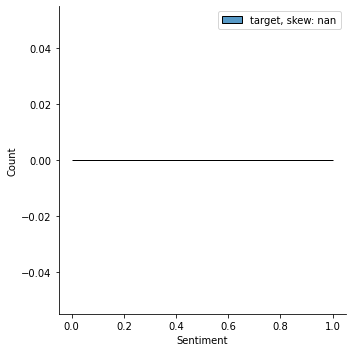

In [121]:
 # Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt. legend(loc='best')
plt.show()

In [122]:
dataset_label.value_counts()

Series([], Name: Sentiment, dtype: int64)

In [123]:
 from sklearn.model_selection import GridSearchCV

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
 from sklearn.metrics import recall_score

In [126]:
from sklearn.metrics import f1_score

In [127]:
 from sklearn.metrics import precision_score

In [128]:
 from sklearn.model_selection import train_test_split

In [140]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature,dataset_label, test_size = 0.3, random_state=42)

NameError: name 'dataset_feature' is not defined

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
 Tfidf_Vectorizer = TfidfVectorizer()


In [132]:
 from sklearn.naive_bayes import MultinomialNB

In [133]:
 from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])


In [134]:
 parameters_nb = {
'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
#'tfidf__use_idf': (True, False),
'model__alpha': (0, 1, 1e-2, 1e-3)
}


In [135]:
 classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [136]:
 classifier_nb.fit(train_x, train_label.ravel())


NameError: name 'train_x' is not defined

In [137]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

NameError: name 'train_x' is not defined

In [138]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

NameError: name 'train_label' is not defined

In [141]:
 precision_nb_train = precision_score(train_label, y_pred_nb_train,average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test,average='weighted')
print("Precision Test set: ", precision_nb_test)

NameError: name 'train_label' is not defined

In [142]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap ='viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()


NameError: name 'test_label' is not defined

In [143]:
 classifier_nb.best_estimator_


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [144]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'